In [1]:
%matplotlib ipympl

from ipywidgets import *

import sys
from time import time
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
from mpl_toolkits.mplot3d import Axes3D, art3d

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 75

import xml.etree.ElementTree as ET
import h5py
import utils

from importlib import reload

sys.path.append('/Users/patrickoare/lqcd/utilities')
# import pytools as pyt
import plottools as pt
import formattools as fmt
pt.set_font()
default_style = fmt.styles['notebook']
default_style['colwidth'] = 15

# import utils
import matplotlib.animation as animation

In [2]:
eval_path = r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/wilson_specflow/complex_evals/U_smr_'
taus = [
    '3.000000',
    '3.012500',
    '3.025000',
    '3.037500',
    '3.050000',
    '3.062500',
    '3.075000',
    '3.087500',
    '3.100000',
    '3.112500',
]

evals = {}
for tau in taus:
    evals[tau] = utils.read_chulwoo_file(f'{eval_path}{tau}')

(<Figure size 1125x562.5 with 1 Axes>,
 <Axes: xlabel='$\\mathbb{R}[\\lambda]$', ylabel='$\\mathbb{I}[\\lambda]$'>)

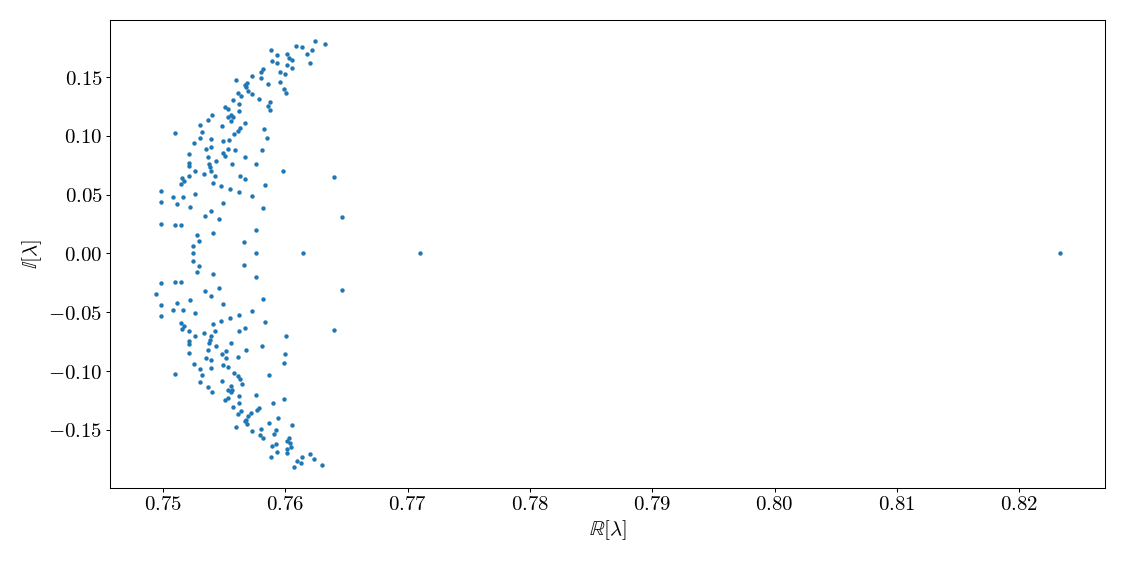

In [3]:
pt.scatter_1d(np.real(evals[taus[0]]), np.imag(evals[taus[0]]), col = pt.pal[0], ax_label = [r'$\mathbb{R}[\lambda]$', r'$\mathbb{I}[\lambda]$'])

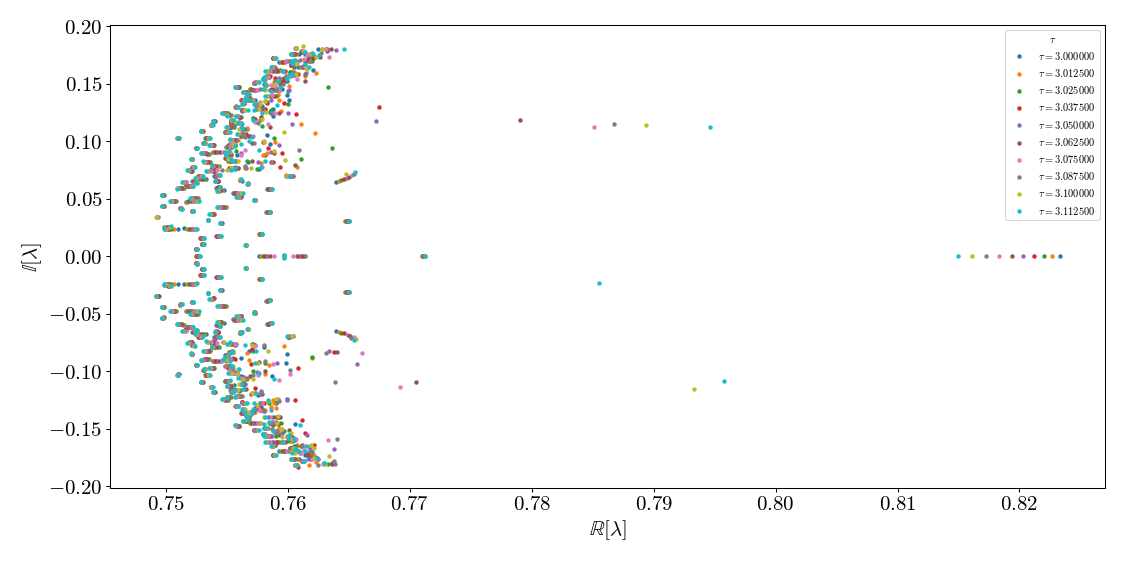

In [4]:
fig, axes = pt.add_subplots()
ax = axes[0]
for idx, tau in enumerate(taus):
    pt.scatter_1d(np.real(evals[tau]), np.imag(evals[tau]), ax = ax, col = pt.pal[idx], fn_label = r'$\tau = ' + tau + r'$', ax_label = [r'$\mathbb{R}[\lambda]$', r'$\mathbb{I}[\lambda]$'])
# plt.legend(title = r'$\tau$', fontsize = default_style['fontsize'])
plt.legend(title = r'$\tau$')

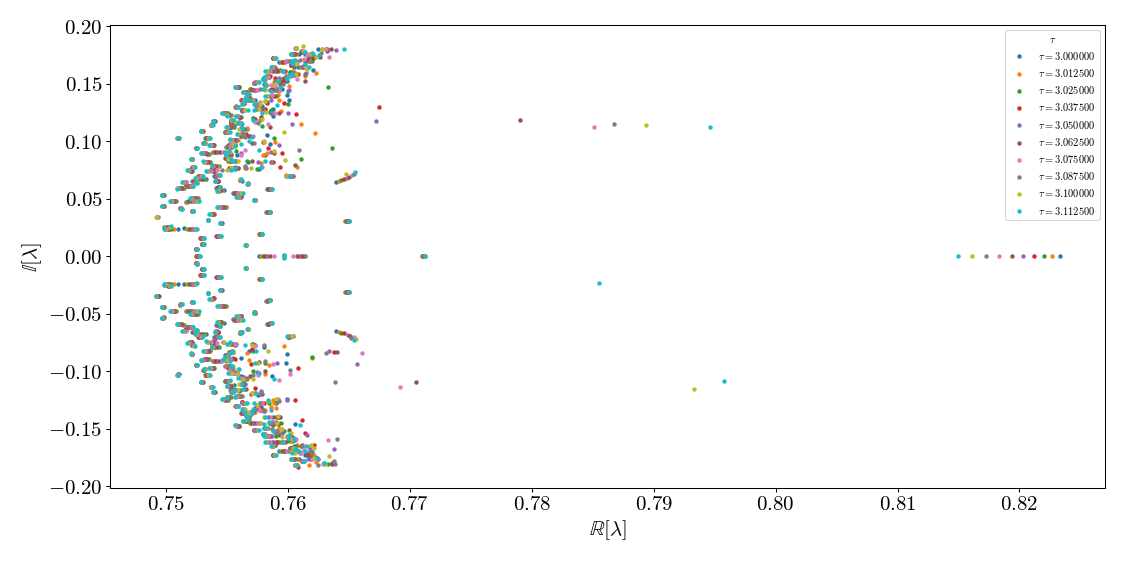

In [5]:
fig, axes = pt.add_subplots()
ax = axes[0]
for idx, tau in enumerate(taus):
    pt.scatter_1d(np.real(evals[tau]), np.imag(evals[tau]), ax = ax, col = pt.pal[idx], fn_label = r'$\tau = ' + tau + r'$', ax_label = [r'$\mathbb{R}[\lambda]$', r'$\mathbb{I}[\lambda]$'])
# plt.legend(title = r'$\tau$', fontsize = default_style['fontsize'])
plt.legend(title = r'$\tau$')

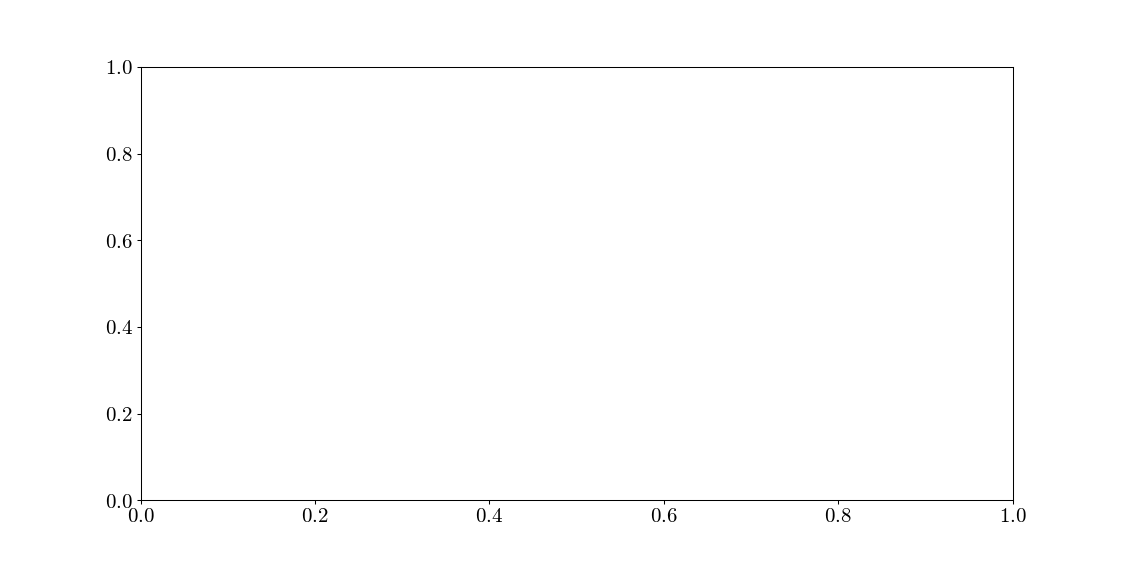

In [6]:
fig, axes = pt.add_subplots()
ax = axes[0]
fig.set_dpi(300)
def update(tidx=0):
    tau = taus[tidx]
    ax.clear()

    pt.add_line(ax, val = 0, orientation = 'h', color = pt.pal[3], alpha = 0.5, linestyle = 'dashed')
    pt.scatter_1d(np.real(evals[tau]), np.imag(evals[tau]), ax = ax, col = pt.pal[0], xlims = (0.74, 0.83), ylims = (-0.2, 0.2), ax_label = [r'$\mathbb{R}[\lambda]$', r'$\mathbb{I}[\lambda]$'])
    
    # TODO add a label for tau
    ax.set_title(r'$\tau = ' + tau + '$', fontsize = default_style['fontsize'])

    fig.canvas.draw_idle()
ani = animation.FuncAnimation(fig=fig, func=update, frames=len(taus), interval=1000, repeat = False)
# ani.save('/Users/patrickoare/Dropbox (Personal)/research/multigrid/wilson_specflow/evals.gif', writer = 'pillow')

In [10]:
default_style

{'colwidth': 15,
 'textwidth': 7.056870070568701,
 'fontsize': 20.0,
 'tickwidth': 1.0,
 'ticklength': 4.0,
 'axeswidth': 1.0,
 'markersize': 30.0,
 'ebar_width': 1.0,
 'endcaps': 2.0,
 'ecap_width': 1.0,
 'bottom_pad': 0.5,
 'top_pad': 1.5,
 'left_pad': 0.5,
 'right_pad': 1.5,
 'asp_ratio': 2.0,
 'linewidth': 3.0}

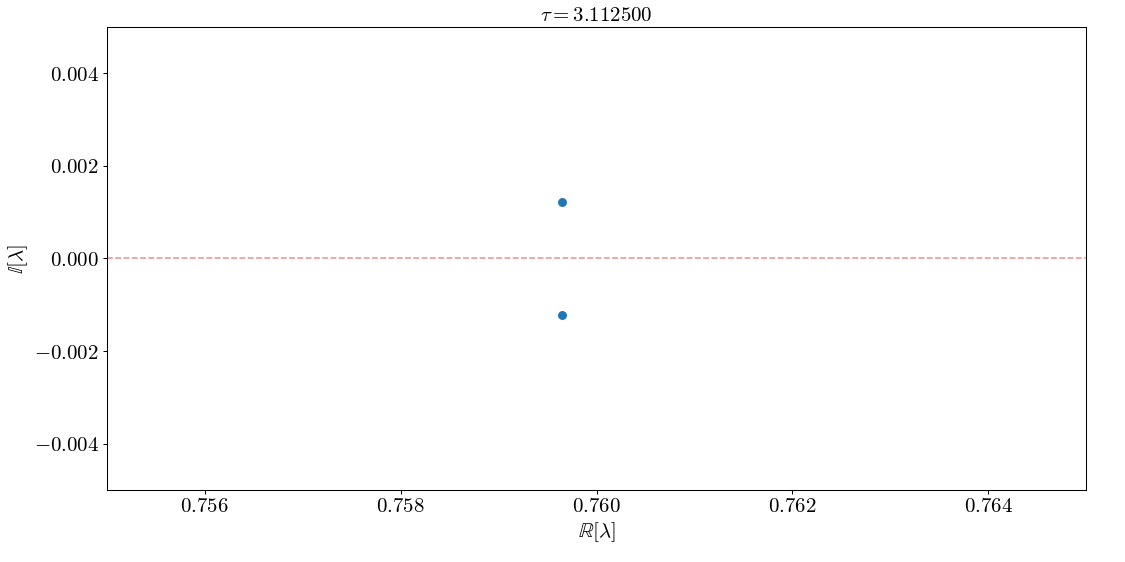

In [13]:
zoom_style = default_style.copy()
zoom_style['markersize'] = 200

fig, axes = pt.add_subplots()
ax = axes[0]
fig.set_dpi(300)
def update(tidx=0):
    tau = taus[tidx]
    ax.clear()

    pt.add_line(ax, val = 0, orientation = 'h', color = pt.pal[3], alpha = 0.5, linestyle = 'dashed')
    pt.scatter_1d(np.real(evals[tau]), np.imag(evals[tau]), ax = ax, col = pt.pal[0], xlims = (0.74, 0.83), ylims = (-0.2, 0.2), ax_label = [r'$\mathbb{R}[\lambda]$', r'$\mathbb{I}[\lambda]$'], style = zoom_style)
    
    ax.set_title(r'$\tau = ' + tau + '$', fontsize = default_style['fontsize'])
    ax.set_xlim((0.755, 0.765))
    ax.set_ylim((-0.005, 0.005))

    fig.canvas.draw_idle()
ani = animation.FuncAnimation(fig=fig, func=update, frames=len(taus), interval=1000, repeat = False)
ani.save('/Users/patrickoare/Dropbox (Personal)/research/multigrid/wilson_specflow/evals_zoomed.gif', writer = 'pillow')

## See convergence history on U_smr_3.000000

In [10]:
reload(utils)

<module 'utils' from '/Users/patrickoare/lqcd/multigrid/python_scripts/utils.py'>

In [11]:
# can see convergence history for this config. Read it in with one extra index, which is the first one that labels the 
# number of iterations
all_path = r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/wilson_specflow/complex_evals/all/U_smr_3.000000_all'
all_evals = utils.read_chulwoo_file(all_path, all_evals = True)

['0', '0.760725839', '0.0316204272']
['0', '0.761377356', '-0.0243968787']
['0', '0.760285598', '0.10113826']
['0', '0.766542206', '0.0674879453']
['0', '0.762793431', '-0.110744374']
['0', '0.767956833', '-0.0803766167']
['0', '0.774699259', '-0.0544363775']
['0', '0.766124886', '0.137659892']
['0', '0.765922861', '-0.144629562']
['0', '0.769081009', '-0.179702458']
['0', '0.771105739', '0.175757233']
['0', '0.795461818', '0.0282287247']
['0', '0.772226787', '-0.211356018']
['0', '0.778451916', '0.198975528']
['0', '0.774223248', '-0.243788581']
['0', '0.778508221', '0.231646879']
['0', '0.777097944', '-0.270938561']
['0', '0.78691898', '0.258570213']
['0', '0.782114162', '0.285972429']
['0', '0.780805222', '-0.292187518']
['0', '0.805571142', '0.30455097']
['0', '0.810196617', '-0.352946446']
['0', '0.812961752', '0.358153077']
['0', '0.81537602', '-0.382052297']
['0', '0.824267704', '0.395546693']
['0', '0.822399854', '-0.423410701']
['0', '0.829041506', '0.432189493']
['0', '0.8378

(<Figure size 1125x562.5 with 1 Axes>,
 <Axes: title={'center': 'Convergence History'}, xlabel='$\\mathbb{R}[\\lambda]$', ylabel='$\\mathbb{I}[\\lambda]$'>)

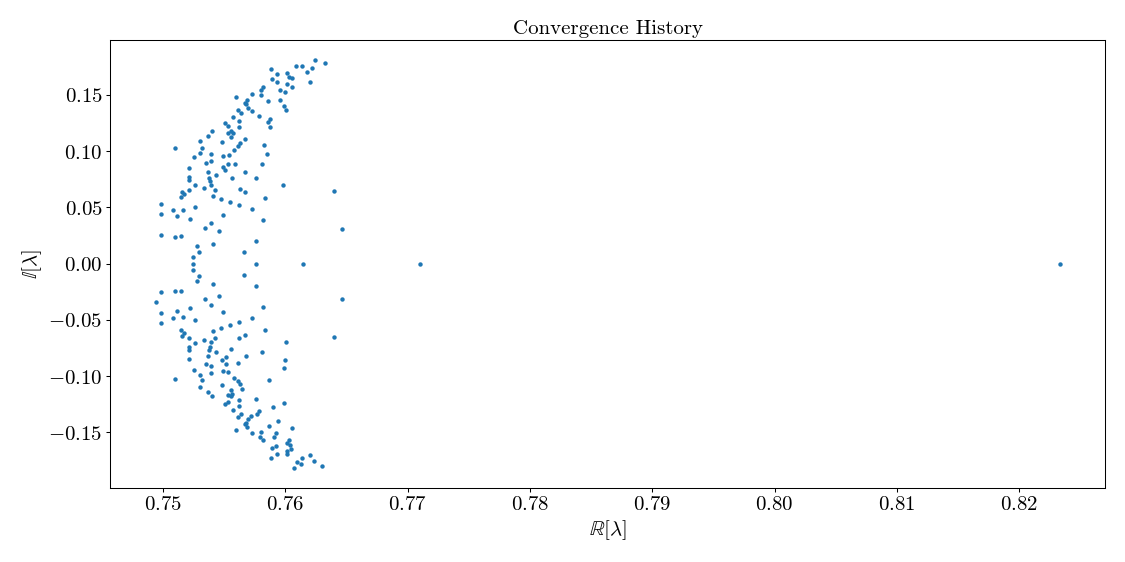

In [12]:
pt.scatter_1d(np.real(all_evals[100]), np.imag(all_evals[100]), col = pt.pal[0], ax_label = [r'$\mathbb{R}[\lambda]$', r'$\mathbb{I}[\lambda]$'], title = 'Convergence History')

interactive(children=(IntSlider(value=0, description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.update0(n=0)>

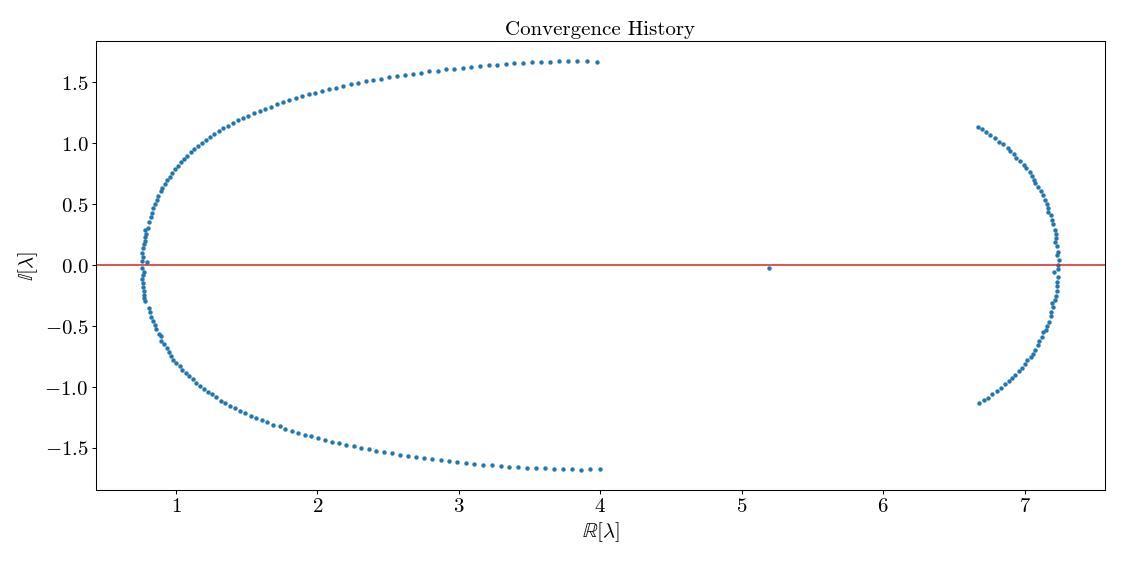

In [ ]:
fig, ax = pt.scatter_1d(np.real(all_evals[0]), np.imag(all_evals[0]), col = pt.pal[0], ax_label = [r'$\mathbb{R}[\lambda]$', r'$\mathbb{I}[\lambda]$'], title = 'Convergence History')

# line0, = ax.plot(xx, np.abs(poly_inv_xx[0]), color = pt.pal[1], linestyle = '--', label = 'Inv on noise')

def update0(n=0):
    # line0.set_ydata(np.real(poly_inv_xx[n]))
    ax.clear()
    pt.scatter_1d(np.real(all_evals[n]), np.imag(all_evals[n]), col = pt.pal[0], ax = ax, ax_label = [r'$\mathbb{R}[\lambda]$', r'$\mathbb{I}[\lambda]$'], title = 'Convergence History')
    pt.add_line(ax, val = 0, orientation = 'h', color = pt.pal[3])
    fig.canvas.draw_idle()
interact(update0, n = (0, 100, 1))

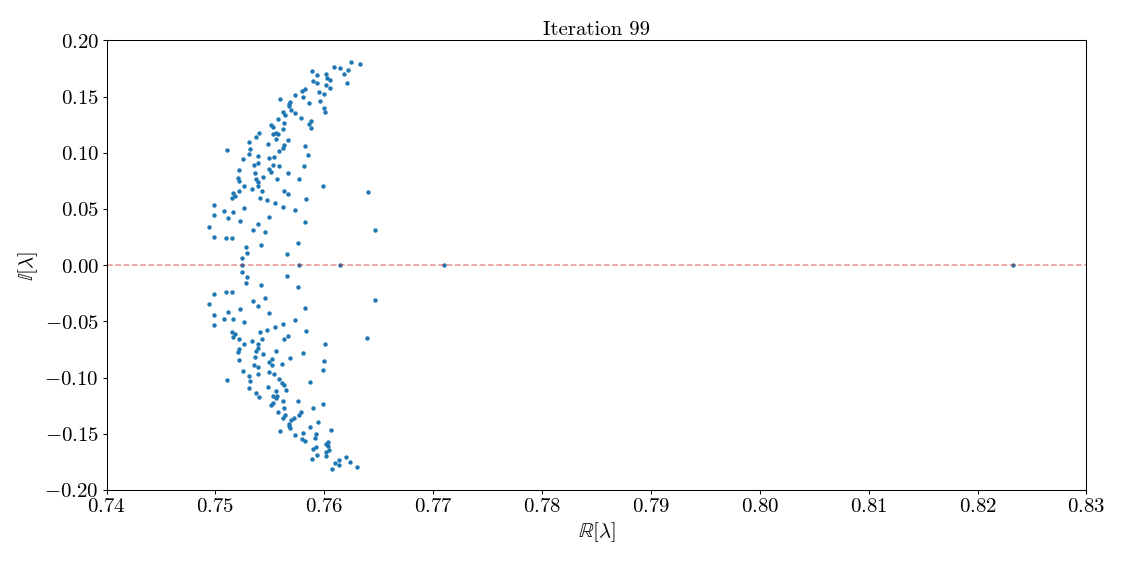

In [21]:
fig, axes = pt.add_subplots()
ax = axes[0]

fig.set_dpi(300)

# pt.scatter_1d(np.real(evals[taus[0]]), np.imag(evals[taus[0]]), ax = ax, col = pt.pal[0], xlims = (0.74, 0.83), ylims = (-0.2, 0.2), ax_label = [r'$\mathbb{R}[\lambda]$', r'$\mathbb{I}[\lambda]$'])
# ax.set_title(r'$\tau = ' + tau[0] + '$')
def update(n=0):
    ax.clear()
    pt.add_line(ax, val = 0, orientation = 'h', color = pt.pal[3], alpha = 0.5, linestyle = 'dashed')
    # pt.scatter_1d(np.real(all_evals[n]), np.imag(all_evals[n]), ax = ax, col = pt.pal[0], xlims = (0.74, 0.83), ylims = (-0.3, 0.3), ax_label = [r'$\mathbb{R}[\lambda]$', r'$\mathbb{I}[\lambda]$'])
    pt.scatter_1d(np.real(all_evals[n]), np.imag(all_evals[n]), ax = ax, col = pt.pal[0], xlims = (0.74, 0.83), title = f'Iteration {n}', ylims = (-0.2, 0.2), ax_label = [r'$\mathbb{R}[\lambda]$', r'$\mathbb{I}[\lambda]$'])
    # ax.set_title(r'Iteration $' + n + r'$', fontsize = default_style['fontsize'])

    fig.canvas.draw_idle()
ani = animation.FuncAnimation(fig=fig, func=update, frames=100, interval=200, repeat = False)
ani.save('/Users/patrickoare/Dropbox (Personal)/research/multigrid/wilson_specflow/convergence.gif', writer = 'pillow')